## Preliminaries

### Paths

In [1]:
import os
import pathlib
import sys

In [2]:
if not 'google.colab' in str(get_ipython()):
    
    notebooks = os.path.split(os.getcwd())[0]
    root = str(pathlib.Path(notebooks).parent)
    sys.path.append(root)

<br>
<br>

### Libraries

In [3]:
%matplotlib inline

import datetime

import logging
import collections

import numpy as np
import pandas as pd

os.environ["CUDA_VISIBLE_DEVICES"]="-1"  
import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import IPython
import IPython.display


<br>
<br>

### Custom

In [4]:
import src.prototyping.Settings

import src.modelling.DataStreams

import src.modelling.DataSplitting
import src.modelling.DataReconstructions
import src.modelling.Differences
import src.modelling.DataNormalisation

import src.modelling.WindowGenerator
import src.modelling.ModellingSteps

<br>

Settings:

> matplotlib.rcParams.update({'font.size': 13})<br>
> matplotlib.rcParams['text.usetex'] = False

> plt.rcParams['figure.constrained_layout.use'] = False        

> sns.set(font_scale=1)<br>
> sns.axes_style('whitegrid', {"axes.facecolor": ".9"})


In [5]:
src.prototyping.Settings.Settings().aesthetics()

<br>

### Logging

In [6]:
logging.basicConfig(level=logging.INFO,
                    format='\n%(message)s\n%(asctime)s.%(msecs)03d\n',
                    datefmt='%Y-%m-%d %H:%M:%S')
logger = logging.getLogger(__name__)

<br>
<br>

## Data: A Collection of Trusts

<br>

### The Splits


The training, validating, and testing data

In [7]:
Fraction = collections.namedtuple(typename='Fraction', field_names=['training', 'validating', 'testing'])
training, validating, testing = src.modelling.DataStreams.DataStreams(root=root, fraction=Fraction._make((0.75, 0.15, 0.10))).exc()

<br>

The split shapes

In [8]:
logger.info('training data %s', training.shape)
logger.info('validating data %s', validating.shape)
logger.info('testing data %s', testing.shape)


training data (72520, 42)
2022-01-30 00:34:32.944


validating data (14420, 42)
2022-01-30 00:34:32.956


testing data (9800, 42)
2022-01-30 00:34:32.957



In [9]:
logger.info(training.columns)


Index(['group', 'date', 'covidOccupiedBeds', 'covidOccupiedMVBeds',
       'estimatedNewAdmissions', 'EDC0-4', 'EDC5-9', 'EDC10-14', 'EDC15-19',
       'EDC20-24', 'EDC25-29', 'EDC30-34', 'EDC35-39', 'EDC40-44', 'EDC45-49',
       'EDC50-54', 'EDC55-59', 'EDC60-64', 'EDC65-69', 'EDC70-74', 'EDC75-79',
       'EDC80-84', 'EDC85-89', 'EDC90+', 'newDeaths28DaysByDeathDate',
       'EDV12-15', 'EDV16-17', 'EDV18-24', 'EDV25-29', 'EDV30-34', 'EDV35-39',
       'EDV40-44', 'EDV45-49', 'EDV50-54', 'EDV55-59', 'EDV60-64', 'EDV65-69',
       'EDV70-74', 'EDV75-79', 'EDV80-84', 'EDV85-89', 'EDV90+'],
      dtype='object')
2022-01-30 00:34:32.966



In [2]:
!rm -rf *.pdf

<br>
<br>

### Variable Settings

<br>


**Reconstructions**

In [10]:
reconstructions = src.modelling.DataReconstructions.DataReconstructions()

In [11]:
training = reconstructions.exc(blob=training)
validating = reconstructions.exc(blob=validating)
testing = reconstructions.exc(blob=testing)

<br>

The shapes

In [12]:
logger.info('training data %s', training.shape)
logger.info('validating data %s', validating.shape)
logger.info('testing data %s', testing.shape)


training data (72520, 42)
2022-01-30 00:34:33.168


validating data (14420, 42)
2022-01-30 00:34:33.169


testing data (9800, 42)
2022-01-30 00:34:33.170



In [13]:
logger.info(training.columns)


Index(['point', 'group', 'covidOccupiedBeds', 'covidOccupiedMVBeds',
       'estimatedNewAdmissions', 'EDC0-4', 'EDC5-9', 'EDC10-14', 'EDC15-19',
       'EDC20-24', 'EDC25-29', 'EDC30-34', 'EDC35-39', 'EDC40-44', 'EDC45-49',
       'EDC50-54', 'EDC55-59', 'EDC60-64', 'EDC65-69', 'EDC70-74', 'EDC75-79',
       'EDC80-84', 'EDC85-89', 'EDC90+', 'newDeaths28DaysByDeathDate',
       'EDV12-15', 'EDV16-17', 'EDV18-24', 'EDV25-29', 'EDV30-34', 'EDV35-39',
       'EDV40-44', 'EDV45-49', 'EDV50-54', 'EDV55-59', 'EDV60-64', 'EDV65-69',
       'EDV70-74', 'EDV75-79', 'EDV80-84', 'EDV85-89', 'EDV90+'],
      dtype='object')
2022-01-30 00:34:33.177



<br>
<br>

**Difference**

In [14]:
differences = src.modelling.Differences.Differences()

In [15]:
training = differences.exc(blob=training)
validating = differences.exc(blob=validating)
testing = differences.exc(blob=testing)

logger.info('training data %s', training.shape)
logger.info('validating data %s', validating.shape)
logger.info('testing data %s', testing.shape)


training data (72380, 42)
2022-01-30 00:34:33.595


validating data (14280, 42)
2022-01-30 00:34:33.596


testing data (9660, 42)
2022-01-30 00:34:33.596



<br>
<br>

**Sample Graphs**

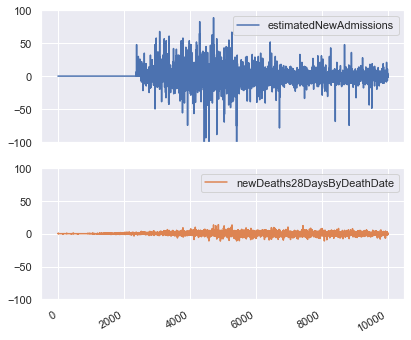

In [16]:
excerpt = training.copy()[['group', 'estimatedNewAdmissions', 'newDeaths28DaysByDeathDate']]
excerpt.iloc[:10000, 1:3].plot(subplots = True, ylim=(-100, 100), figsize=(6.5, 5.9));

<br>
<br>

**Normalisation**

* Via the means & deviations of the training data

In [17]:
normalisation = src.modelling.DataNormalisation.DataNormalisation(reference=training)

training_ = normalisation.normalise(blob=training)
validating_ = normalisation.normalise(blob=validating)
testing_ = normalisation.normalise(blob=testing)

<br>

The normalised values

In [18]:
logger.info('Training: %s', training_.shape)
logger.info('Validating: %s', validating_.shape)
logger.info('Testing: %s', testing_.shape)


Training: (72380, 42)
2022-01-30 00:34:35.305


Validating: (14280, 42)
2022-01-30 00:34:35.307


Testing: (9660, 42)
2022-01-30 00:34:35.308



In [19]:
training_.drop(columns='point', inplace=True)
validating_.drop(columns='point', inplace=True)
testing_.drop(columns='point', inplace=True)

logger.info(training_.columns)


Index(['group', 'covidOccupiedBeds', 'covidOccupiedMVBeds',
       'estimatedNewAdmissions', 'EDC0-4', 'EDC5-9', 'EDC10-14', 'EDC15-19',
       'EDC20-24', 'EDC25-29', 'EDC30-34', 'EDC35-39', 'EDC40-44', 'EDC45-49',
       'EDC50-54', 'EDC55-59', 'EDC60-64', 'EDC65-69', 'EDC70-74', 'EDC75-79',
       'EDC80-84', 'EDC85-89', 'EDC90+', 'newDeaths28DaysByDeathDate',
       'EDV12-15', 'EDV16-17', 'EDV18-24', 'EDV25-29', 'EDV30-34', 'EDV35-39',
       'EDV40-44', 'EDV45-49', 'EDV50-54', 'EDV55-59', 'EDV60-64', 'EDV65-69',
       'EDV70-74', 'EDV75-79', 'EDV80-84', 'EDV85-89', 'EDV90+'],
      dtype='object')
2022-01-30 00:34:35.362



<br>
<br>

## Windows


### Window


<br>

**Case**

> * Predict `output_steps` days into the future, based on `input_width` days of history

Therefore

* $sequence\_length = total\_window\_size = input\_width + output\_steps$

Noting that

* $sequence\_stride = 1$
* $batch\_size = 32$

**always**.

<br>

Hence, **defining a *modelling arguments* class** for declaring a set of model arguments, including windowing arguments

In [20]:
Arguments = collections.namedtuple(typename='Arguments', 
                                   field_names=['input_width', 'label_width', 'shift', 'training_', 'validating_', 'testing_', 'label_columns'])

<br>

**Initialising a *modelling arguments* class**

In [21]:
widths = range(27, 40)
output_steps = 15
input_width = widths[0]

In [22]:
arguments = Arguments(input_width=input_width, label_width=output_steps, shift=output_steps, 
                      training_=training_, validating_=validating_, testing_=testing_, 
                      label_columns=['estimatedNewAdmissions'])

<br>

**Initialising a modelling window generator**

In [23]:
window = src.modelling.WindowGenerator.WindowGenerator(
    input_width=arguments.input_width, label_width=arguments.label_width, shift=arguments.shift,
    training=arguments.training_, validating=arguments.validating_, testing=arguments.testing_, 
    label_columns=arguments.label_columns)

In [24]:
logger.info(window)


Total window size: 42
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
Label indices: [27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Label column name(s): ['estimatedNewAdmissions']
2022-01-30 00:34:35.394



<br>

**Specifications**

In [25]:
logger.info(window.train.element_spec)
logger.info(window.validate.element_spec)
logger.info(window.test.element_spec)


(TensorSpec(shape=(None, 27, 41), dtype=tf.float32, name=None), TensorSpec(shape=(None, 15, 1), dtype=tf.float32, name=None))
2022-01-30 00:34:35.992


(TensorSpec(shape=(None, 27, 41), dtype=tf.float32, name=None), TensorSpec(shape=(None, 15, 1), dtype=tf.float32, name=None))
2022-01-30 00:34:36.036


(TensorSpec(shape=(None, 27, 41), dtype=tf.float32, name=None), TensorSpec(shape=(None, 15, 1), dtype=tf.float32, name=None))
2022-01-30 00:34:36.078



<br>
<br>

## Modelling

In [26]:
n_features = training_.shape[1]

<br>

Initiate a generic modelling steps instance

In [27]:
steps = src.modelling.ModellingSteps.ModellingSteps()

<br>

Diagnostics

In [28]:
validations = pd.DataFrame(columns=['method', 'history', 'ahead', 'loss', 'mae'])
tests = pd.DataFrame(columns=['method', 'history', 'ahead', 'loss', 'mae'])

<br>
<br>

### Convolution

In [29]:
convolution_width = input_width

In [30]:
convolution = tf.keras.Sequential([    
    tf.keras.layers.Lambda(lambda x: x[:, -convolution_width:, :]),    
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(convolution_width)),
    tf.keras.layers.Dense(output_steps * n_features, kernel_initializer=tf.initializers.zeros()),
    tf.keras.layers.Reshape([output_steps, n_features])
])

convolution_ = steps.modelling(model=convolution, window=window)

Epoch 1/100
2261/2261 [==============================] - 14s 6ms/step - loss: 39.1974 - mean_absolute_error: 1.7676 - val_loss: 0.6891 - val_mean_absolute_error: 0.6178
Epoch 2/100
2261/2261 [==============================] - 13s 6ms/step - loss: 2.9994 - mean_absolute_error: 0.7132 - val_loss: 0.5966 - val_mean_absolute_error: 0.5741
Epoch 3/100
2261/2261 [==============================] - 14s 6ms/step - loss: 1.6015 - mean_absolute_error: 0.6630 - val_loss: 0.5198 - val_mean_absolute_error: 0.5278
Epoch 4/100
2261/2261 [==============================] - 14s 6ms/step - loss: 1.6158 - mean_absolute_error: 0.6673 - val_loss: 0.7586 - val_mean_absolute_error: 0.6126
Epoch 5/100
2261/2261 [==============================] - 15s 7ms/step - loss: 1.6985 - mean_absolute_error: 0.6658 - val_loss: 9.2017 - val_mean_absolute_error: 1.3708
Epoch 6/100
2261/2261 [==============================] - 15s 7ms/step - loss: 1.1881 - mean_absolute_error: 0.5756 - val_loss: 0.4856 - val_mean_absolute_error

In [31]:
validations.loc[validations.shape[0], :] = ['CNN', input_width, output_steps] + convolution_.model.evaluate(window.validate, verbose=0)
tests.loc[tests.shape[0], :] = ['CNN', input_width, output_steps] + convolution_.model.evaluate(window.test, verbose=0)

<br>
<br>

### RNN

In [32]:
lstm = tf.keras.Sequential([    
    tf.keras.layers.LSTM(32, return_sequences=False),    
    tf.keras.layers.Dense(output_steps * n_features, kernel_initializer=tf.initializers.zeros()),    
    tf.keras.layers.Reshape([output_steps, n_features])
])

lstm_ = steps.modelling(model=lstm, window=window)

Epoch 1/100
2261/2261 [==============================] - 32s 13ms/step - loss: 0.9990 - mean_absolute_error: 0.4979 - val_loss: 0.4723 - val_mean_absolute_error: 0.4890
Epoch 2/100
2261/2261 [==============================] - 30s 13ms/step - loss: 0.9978 - mean_absolute_error: 0.4988 - val_loss: 0.4724 - val_mean_absolute_error: 0.4892
Epoch 3/100
2261/2261 [==============================] - 30s 13ms/step - loss: 0.9963 - mean_absolute_error: 0.4998 - val_loss: 0.4728 - val_mean_absolute_error: 0.4908
Epoch 4/100
2261/2261 [==============================] - 30s 13ms/step - loss: 0.9942 - mean_absolute_error: 0.5008 - val_loss: 0.4740 - val_mean_absolute_error: 0.4924
Epoch 5/100
2261/2261 [==============================] - 30s 13ms/step - loss: 0.9921 - mean_absolute_error: 0.5017 - val_loss: 0.4753 - val_mean_absolute_error: 0.4941
Epoch 6/100
2261/2261 [==============================] - 30s 13ms/step - loss: 0.9893 - mean_absolute_error: 0.5025 - val_loss: 0.4780 - val_mean_absolute_

In [33]:
validations.loc[validations.shape[0], :] = ['LSTM', input_width, output_steps] + lstm_.model.evaluate(window.validate, verbose=0)
tests.loc[tests.shape[0], :] = ['LSTM', input_width, output_steps] + lstm_.model.evaluate(window.test, verbose=0)

<br>
<br>

### GRU

```python
gru = tf.keras.Sequential([
    tf.keras.layers.GRU(32, input_shape=(input_width, n_features), return_sequences=True, activation='relu', kernel_initializer=tf.initializers.HeUniform()),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.GRU(16, return_sequences=True, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.GRU(output_steps * n_features, activation='relu'),
    tf.keras.layers.Reshape([output_steps, n_features])
])

gru_ = steps.modelling(model=gru, window=window)
```

```python
validations.loc[validations.shape[0], :] = ['GRU', input_width, output_steps] + gru_.model.evaluate(window.validate, verbose=0)
tests.loc[tests.shape[0], :] = ['GRU', input_width, output_steps] + gru_.model.evaluate(window.test, verbose=0)
```

<br>
<br>

## Performance

### Endpoints

In [34]:
validations

,method,history,ahead,loss,mae
0,CNN,27,15,0.498223,0.511096
1,LSTM,27,15,0.497101,0.511819


In [35]:
tests

,method,history,ahead,loss,mae
0,CNN,27,15,2.18101,0.938894
1,LSTM,27,15,1.11808,0.689317


<br>

### Histories

**Convolution**

In [36]:
convolution_history = pd.DataFrame(convolution_.history)
convolution_history.loc[:, 'method'] = 'CNN'
convolution_history.loc[:, 'history'] = input_width
convolution_history.loc[:, 'ahead'] = output_steps
convolution_history

,loss,mean_absolute_error,val_loss,val_mean_absolute_error,method,history,ahead
0,39.197395,1.767592,0.689102,0.617779,CNN,27,15
1,2.999449,0.713157,0.596590,0.574074,CNN,27,15
2,1.601503,0.663026,0.519847,0.527824,CNN,27,15
3,1.615808,0.667322,0.758597,0.612596,CNN,27,15
4,1.698496,0.665824,9.201745,1.370777,CNN,27,15
5,1.188086,0.575621,0.485564,0.501946,CNN,27,15
6,1.174344,0.570001,0.493994,0.507256,CNN,27,15
7,1.031752,0.521531,0.478851,0.494866,CNN,27,15
8,2.620107,0.732203,3.868306,1.168700,CNN,27,15
9,1.269967,0.588232,0.486278,0.501661,CNN,27,15


<br>

**LSTM**

In [37]:
lstm_history = pd.DataFrame(data=lstm_.history)
lstm_history.loc[:, 'method'] = 'LSTM'
lstm_history.loc[:, 'history'] = input_width
lstm_history.loc[:, 'ahead'] = output_steps
lstm_history

,loss,mean_absolute_error,val_loss,val_mean_absolute_error,method,history,ahead
0,0.998966,0.497934,0.472296,0.488981,LSTM,27,15
1,0.997758,0.498828,0.472450,0.489181,LSTM,27,15
2,0.996345,0.499755,0.472766,0.490754,LSTM,27,15
3,0.994235,0.500828,0.473960,0.492424,LSTM,27,15
4,0.992082,0.501704,0.475283,0.494114,LSTM,27,15
5,0.989257,0.502487,0.478032,0.497015,LSTM,27,15
6,0.986437,0.503365,0.482224,0.500722,LSTM,27,15
7,0.982034,0.504277,0.487704,0.505092,LSTM,27,15
8,0.978102,0.504926,0.491400,0.507771,LSTM,27,15
9,0.972464,0.505820,0.497101,0.511819,LSTM,27,15


<br>

**GRU**



```python
gru_history = pd.DataFrame(data=gru_.history)
gru_history.loc[:, 'method'] = 'GRU'
gru_history.loc[:, 'history'] = input_width
gru_history.loc[:, 'ahead'] = output_steps
gru_history
```

<br>
<br>

## A Note About Predictors

* https://www.tensorflow.org/api_docs/python/tf/keras/Model
* https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict

<br>

The predicted object must be de-windowed, de-normalised, de-differenced, de-constructed; take note of the reverse order of the arithmetic steps.

In [123]:
object = lstm_.model.predict(window.test)

In [125]:
object.shape

(9619, 15, 41)